In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# importo le librerie necessarie

In [2]:
arpa_col = ['data', 'ora', 'id_rete_monit', 'comune_istat', 'stazione_istat', 'vento_vel', 'vento_dir', 'std_velt', 
             'baro', 'terma', 'igro', 'rad_dir', 'rad_rif', 'pluv'] 
# definisco i nomi delle colonne di un dataset per il quale esse non sono presenti

In [4]:
arpa = pd.read_csv('Desktop/STRUMENTI/dataset per esercizi/arpa_2.csv', header=None, names=arpa_col)

In [5]:
arpa_al = arpa.drop(['id_rete_monit', 'comune_istat', 'stazione_istat'], axis=1) 
# elimino colonne dalla tabella di cui sopra
arpa_al.head(2)

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv
0,01-01-2001,00:00,2.5,352.9,9999.9,996.0,-2.2,74.0,9999.9,9999.9,0.0
1,01-01-2001,01:00,2.6,354.2,9999.9,999.0,-2.1,70.0,9999.9,9999.9,0.0


In [6]:
arpa_al.info()
# mi fornisce tutte le informazioni inerenti ogni singolo campo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
data         8760 non-null object
ora          8760 non-null object
vento_vel    8760 non-null float64
vento_dir    8760 non-null float64
std_velt     8760 non-null float64
baro         8760 non-null float64
terma        8760 non-null float64
igro         8760 non-null float64
rad_dir      8760 non-null float64
rad_rif      8760 non-null float64
pluv         8760 non-null float64
dtypes: float64(9), object(2)
memory usage: 752.9+ KB


In [7]:
arpa_al.pluv.describe()
# voglio la descrizione di una delle sole colonne 

count    8760.000000
mean        0.096438
std         0.696375
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        23.600000
Name: pluv, dtype: float64

In [8]:
arpa_al['mese'] = arpa_al['data'].apply(lambda mese: mese.split('-')[1])
# utilizzo questa funzione per splittare il mese dalla data creando una nuova colonna 
arpa_al.head(2)

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,mese
0,01-01-2001,00:00,2.5,352.9,9999.9,996.0,-2.2,74.0,9999.9,9999.9,0.0,01
1,01-01-2001,01:00,2.6,354.2,9999.9,999.0,-2.1,70.0,9999.9,9999.9,0.0,01


In [9]:
arpa_al['giorno'] = arpa_al['data'].apply(lambda giorno: giorno.split('-')[0])
# utilizzo questa funzione per splittare il mese dalla data creando una nuova colonna 
arpa_al.head(2)

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,mese,giorno
0,01-01-2001,00:00,2.5,352.9,9999.9,996.0,-2.2,74.0,9999.9,9999.9,0.0,01,01
1,01-01-2001,01:00,2.6,354.2,9999.9,999.0,-2.1,70.0,9999.9,9999.9,0.0,01,01


In [10]:
arpa_al.groupby('mese')
# creami un dataframe raggruppato per mese

In [12]:
arpa_al[  (arpa_al.pluv == arpa_al.pluv.values.max())  ]
# mi prende il valore massimo della colonna pluv

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,mese,giorno
5296,09-08-2001,16:00,1.7,163.1,9999.9,998.0,16.9,90.0,9999.9,9999.9,23.6,08,09


In [41]:
arpa_al.sort_values('pluv',ascending=False).head(2)
#Il metodo sort_values ritorna un dataframe ordinato in base a una o più colonne: in questo caso pluv

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,mese,giorno
5296,09-08-2001,16:00,1.7,163.1,9999.9,998.0,16.9,90.0,9999.9,9999.9,23.6,08,09
4001,16-06-2001,17:00,3.6,339.8,9999.9,992.0,13.8,100.0,9999.9,9999.9,22.4,06,16


In [14]:
arpa_mean = arpa_al.groupby('mese').mean() 
arpa_mean

,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv
mese,,,,,,,,,
01,0.398387,7083.604167,9999.9,1010.771371,0.532527,87.811828,9999.9,9999.9,0.088978
02,0.950446,4785.901339,9999.9,999.825893,3.224702,73.217262,9999.9,9999.9,0.072917
03,0.790457,5459.180376,9999.9,991.384409,7.319489,84.866935,9999.9,9999.9,0.233871
04,0.845417,4550.416944,9999.9,994.626389,9.112778,66.573611,9999.9,9999.9,0.053056
05,0.579167,6117.658199,9999.9,997.745968,16.109543,75.158602,9999.9,9999.9,0.134409
06,0.834444,5340.560000,9999.9,997.805556,18.135972,64.401389,9999.9,9999.9,0.075278
07,0.600269,6099.374194,9999.9,997.491935,21.001613,67.830645,9999.9,9999.9,0.053763
08,148.439651,6124.360753,9999.9,1120.157258,155.648790,205.514785,9999.9,9999.9,0.150000
09,0.733889,5577.871806,9999.9,996.004167,13.651528,77.337500,9999.9,9999.9,0.126389


In [15]:
arpa_mean_2 = arpa_al.groupby('giorno').mean() 
arpa_mean_2

,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv
giorno,,,,,,,,,
01,0.823958,5520.404514,9999.9,999.812500,11.008681,72.000000,9999.9,9999.9,0.020139
02,0.557292,6110.953819,9999.9,1001.190972,10.548611,74.840278,9999.9,9999.9,0.060417
03,0.797917,5608.877431,9999.9,998.312500,9.951736,79.788194,9999.9,9999.9,0.043750
04,0.551042,6468.051736,9999.9,996.690972,9.378472,84.895833,9999.9,9999.9,0.272222
05,0.705556,6035.310069,9999.9,996.871528,10.563542,80.815972,9999.9,9999.9,0.040972
06,0.463889,6683.759722,9999.9,997.982639,11.321528,80.243056,9999.9,9999.9,0.094444
07,0.440278,7120.672222,9999.9,997.524306,11.218403,84.229167,9999.9,9999.9,0.181250
08,0.662153,5862.599653,9999.9,995.781250,11.033681,83.645833,9999.9,9999.9,0.243056
09,0.889236,5492.746181,9999.9,996.909722,10.968056,77.864583,9999.9,9999.9,0.159028


In [16]:
arpa_mean.index
# mi creo un indice del df raggruppato per singolo mese

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='mese')

In [17]:
arpa_mean_2.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31'],
      dtype='object', name='giorno')

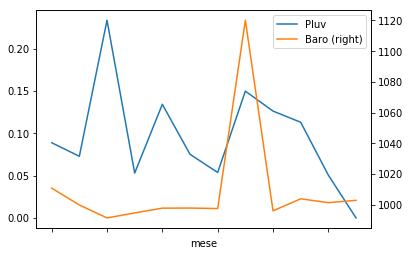

In [19]:
arpa_mean.pluv.plot(label="Pluv", legend=True)
# con secondary_y=True facciamo apparire i numeri per l'asse delle y
# del secondo grafico sulla destra
arpa_mean.baro.plot(secondary_y=True, label="Baro", legend=True);
# grafico con valori della pioggia messi a confronto con quelli della pressione atmosferica raggruppati per mese

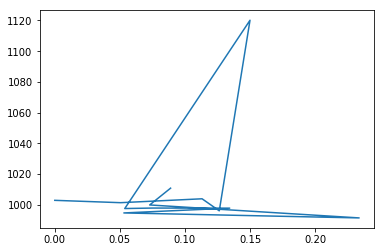

In [22]:
plt.plot(arpa_mean['pluv'], arpa_mean['baro'])

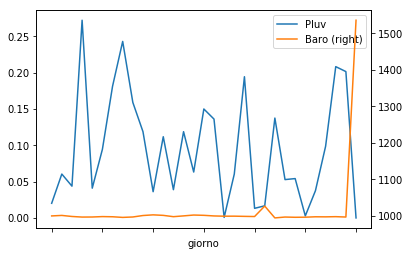

In [24]:
arpa_mean_2.pluv.plot(label="Pluv", legend=True)
# con secondary_y=True facciamo apparire i numeri per l'asse delle y
# del secondo grafico sulla destra
arpa_mean_2.baro.plot(secondary_y=True, label="Baro", legend=True);
# grafico con valori della pioggia messi a confronto con quelli della pressione atmosferica raggruppati per giorno

In [32]:
arpa_al[  arpa_al['data'].str.contains('05-01-2001')  ]
#str.contains permette di filtrare per valori testuali in questo caso solo i valori riferiti al 05/02/2001

,data,ora,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv,mese,giorno
96,05-01-2001,00:00,0.0,9999.9,9999.9,994.0,-1.5,100.0,9999.9,9999.9,0.0,01,05
97,05-01-2001,01:00,0.0,9999.9,9999.9,996.0,-1.6,100.0,9999.9,9999.9,0.0,01,05
98,05-01-2001,02:00,0.0,9999.9,9999.9,997.0,-1.4,100.0,9999.9,9999.9,0.0,01,05
99,05-01-2001,03:00,0.0,9999.9,9999.9,997.0,-1.6,100.0,9999.9,9999.9,0.0,01,05
100,05-01-2001,04:00,0.0,9999.9,9999.9,997.0,-1.3,100.0,9999.9,9999.9,0.0,01,05
101,05-01-2001,05:00,1.4,357.7,9999.9,996.0,-1.0,100.0,9999.9,9999.9,0.0,01,05
102,05-01-2001,06:00,1.6,3.4,9999.9,996.0,-0.9,100.0,9999.9,9999.9,0.0,01,05
103,05-01-2001,07:00,0.3,333.8,9999.9,996.0,-1.1,100.0,9999.9,9999.9,0.0,01,05
104,05-01-2001,08:00,1.4,220.7,9999.9,997.0,-1.3,100.0,9999.9,9999.9,0.0,01,05
105,05-01-2001,09:00,1.2,307.1,9999.9,997.0,-1.3,100.0,9999.9,9999.9,0.0,01,05


In [33]:
arpa_al.to_csv('Desktop/arpa_al.csv', sep=';', decimal='.', index=False) 
#per salvarti una tabella sotto forma di csv; con index = False non ti mette gli gli indici

In [35]:
arpa_mean.to_csv('Desktop/arpa_mean.csv', sep=';', decimal='.', index=True) 
#per salvarti una tabella sotto forma di csv

In [36]:
arpa_mean_2.to_csv('Desktop/arpa_mean_2.csv', sep=';', decimal='.', index=True) 
#per salvarti una tabella sotto forma di csv

In [37]:
arpa_al.corr()

,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv
vento_vel,1.000000e+00,2.780809e-02,1.145117e-15,8.175564e-01,8.577877e-01,8.565300e-01,1.145117e-15,1.145117e-15,1.567375e-02
vento_dir,2.780809e-02,1.000000e+00,-1.125093e-13,2.609002e-02,2.865499e-02,4.056657e-02,-1.125093e-13,-1.125093e-13,-6.533467e-02
std_velt,1.145117e-15,-1.125093e-13,1.000000e+00,1.229607e-15,-1.062875e-15,8.013049e-16,1.000000e+00,1.000000e+00,2.469524e-15
baro,8.175564e-01,2.609002e-02,1.229607e-15,1.000000e+00,9.526975e-01,9.513530e-01,1.229607e-15,1.229607e-15,-7.184873e-03
terma,8.577877e-01,2.865499e-02,-1.062875e-15,9.526975e-01,1.000000e+00,9.967390e-01,-1.062875e-15,-1.062875e-15,-4.853212e-03
igro,8.565300e-01,4.056657e-02,8.013049e-16,9.513530e-01,9.967390e-01,1.000000e+00,8.013049e-16,8.013049e-16,3.104255e-03
rad_dir,1.145117e-15,-1.125093e-13,1.000000e+00,1.229607e-15,-1.062875e-15,8.013049e-16,1.000000e+00,1.000000e+00,2.469524e-15
rad_rif,1.145117e-15,-1.125093e-13,1.000000e+00,1.229607e-15,-1.062875e-15,8.013049e-16,1.000000e+00,1.000000e+00,2.469524e-15
pluv,1.567375e-02,-6.533467e-02,2.469524e-15,-7.184873e-03,-4.853212e-03,3.104255e-03,2.469524e-15,2.469524e-15,1.000000e+00


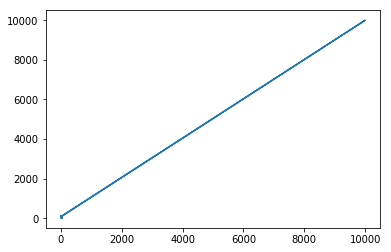

In [40]:
arpa_al_2=arpa_al.iloc[5000:8000]
#Selezioniamo nel nuovo dataframe df2 le righe tra la 12500esima (inclusa) e la 15000esima (esclusa):
#plt.plot(df2['pressure'], df2['humidity'])
arpa_al_2.head()
plt.plot(arpa_al_2['terma'], arpa_al_2['igro'])

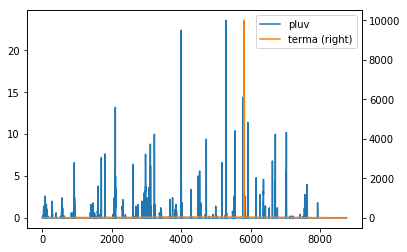

In [42]:
arpa_al.pluv.plot(label="pluv", legend=True)
# con secondary_y=True facciamo apparire i numeri per l'asse delle y
# del secondo grafico sulla destra
arpa_al.terma.plot(secondary_y=True, label="terma", legend=True);

In [44]:
arpetta = arpa_al.corr()
arpetta

,vento_vel,vento_dir,std_velt,baro,terma,igro,rad_dir,rad_rif,pluv
vento_vel,1.000000e+00,2.780809e-02,1.145117e-15,8.175564e-01,8.577877e-01,8.565300e-01,1.145117e-15,1.145117e-15,1.567375e-02
vento_dir,2.780809e-02,1.000000e+00,-1.125093e-13,2.609002e-02,2.865499e-02,4.056657e-02,-1.125093e-13,-1.125093e-13,-6.533467e-02
std_velt,1.145117e-15,-1.125093e-13,1.000000e+00,1.229607e-15,-1.062875e-15,8.013049e-16,1.000000e+00,1.000000e+00,2.469524e-15
baro,8.175564e-01,2.609002e-02,1.229607e-15,1.000000e+00,9.526975e-01,9.513530e-01,1.229607e-15,1.229607e-15,-7.184873e-03
terma,8.577877e-01,2.865499e-02,-1.062875e-15,9.526975e-01,1.000000e+00,9.967390e-01,-1.062875e-15,-1.062875e-15,-4.853212e-03
igro,8.565300e-01,4.056657e-02,8.013049e-16,9.513530e-01,9.967390e-01,1.000000e+00,8.013049e-16,8.013049e-16,3.104255e-03
rad_dir,1.145117e-15,-1.125093e-13,1.000000e+00,1.229607e-15,-1.062875e-15,8.013049e-16,1.000000e+00,1.000000e+00,2.469524e-15
rad_rif,1.145117e-15,-1.125093e-13,1.000000e+00,1.229607e-15,-1.062875e-15,8.013049e-16,1.000000e+00,1.000000e+00,2.469524e-15
pluv,1.567375e-02,-6.533467e-02,2.469524e-15,-7.184873e-03,-4.853212e-03,3.104255e-03,2.469524e-15,2.469524e-15,1.000000e+00


In [45]:
arpetta.to_csv('Desktop/arpetta.csv', sep=';', decimal='.', index=True) 
#per salvarti una tabella sotto forma di csv